## Import all Necessary Packages
### This will be accomplished in order to have access to all libraries and functions.

In order to begin our project, we must import all necessary packages. In our case, these include:
- Numpy (as np): for array creation and general matrix processing
- Pandas (as pd): for DataFrame creation, fast indexing, and table visualization
- Matplotlib (as plt): for visualization and matrix displays
- Scipy.stats (as scpstats): for the use of linear algebra functions, to calculate the trim mean, and to calculate kurtosis

In [32]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib
import matplotlib.pyplot as plt 
import scipy.fft as scpfft
import scipy.stats as scpstats
import sklearn as skl
import sklearn.decomposition as skdec
import itertools

## Let's begin by reading in our data:
For this project we'll use the classic Iris Data Set.

- This can be easily accomplished using the pandas function read_csv
- The following lines will read in the data from the csv and assign it to a variable called iris_data
- The following code will then also display the first 5 lines of iris_data to ensure corrrect reading, by calling iris_data.head()

In [20]:
iris_data = pd.read_csv('Data/iris.csv', skipinitialspace= True)        # Read in the CSV, skipping initial spaces in order to ensure no strange indexing calls
iris_data.head()                                                        # Display the first five rows of the data to check the DataFrame structure

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We could call a number of different Pandas functions in order to analyze our data, but let's save ourselves some time and a few lines of code. Let's establish a function which takes in a series of data and returns all metric that we're interested in seeing. These include:

- This function will accept a series and output a DataFrame with all relevant descriptive statistics, being:
    - Minimum - taken using the built-in pandas function .min()
    - Maximum - taken using the built-in pandas function .max()
    - Trim mean - taken using the built-in scipy.stats function trim_mean()
    - Standard Deviation - taken using the built-in pandas function .std()
    - Skew - taken using the built-in pandas function .skew()
    - Kurtosis - taken using the built-in scipy.stats function .kurtosis()
- The resulting output will create a DataFrame, with the labeled columns containing each of the computed statistics. 

In [21]:
def analysis(series):
    minimum = [series.min()]                                    
    maximum = [series.max()]                                    
    mean = [series.mean()]
    trim_mean = [scpstats.trim_mean(series, 0.1)]
    st_dev = [series.std()]
    skew = [series.skew()]
    kurt = [scpstats.kurtosis(series)]
    output = pd.DataFrame({'Minimum': minimum,  
    'Maximum': maximum, 'Mean': mean, 'Trim Mean': trim_mean, 
    'Std. Dev': st_dev, 'Skew': skew, 'Kurtosis': kurt})
    return output

We can now analyze each analysis vector of interest with just a few simples lines of code.
For example, let's say we're interested in the global statistics for each of the four features listed above. 



As an example, let's look at the global statistics of interests for the Sepal Length space. 

In [22]:
sepal_length_stats = analysis(iris_data['sepal_length'])          # Apply the Function Defined Above
sepal_length_stats                                              # Display the Resulting DataFrame

,Minimum,Maximum,Mean,Trim Mean,Std. Dev,Skew,Kurtosis
0,4.3,7.9,5.843333,5.808333,0.828066,0.314911,-0.573568


Now that we've ensured our cute little analysis function works as intended, let's create some vectors for each of the four features in the dataset. 

In [23]:
sepal_width_stats = analysis(iris_data['sepal_width'])            # Apply the Function Defined Above
petal_length_stats = analysis(iris_data['petal_length'])          # Apply the function defined above
petal_width_stats = analysis(iris_data['petal_width'])            # Apply the function defined above

# Create a vector using the four DataFrames extracted above, and a Dictionary for their Labels in the concatenated DataFrame
features_dfs = [sepal_length_stats, sepal_width_stats, petal_length_stats, petal_width_stats]
features_dict = ["Sepal Length Global", "Sepal Width Global", "Petal Length Global", "Petal Width Global"]

# Perform Concatenation and Display the Resulting DataFrame
Feature_Analysis = pd.concat(features_dfs, keys= features_dict, names=["Feature"]).reset_index(0).reset_index(0, drop=True)
Feature_Analysis

,Feature,Minimum,Maximum,Mean,Trim Mean,Std. Dev,Skew,Kurtosis
0,Sepal Length Global,4.3,7.9,5.843333,5.808333,0.828066,0.314911,-0.573568
1,Sepal Width Global,2.0,4.4,3.054000,3.039167,0.433594,0.334053,0.241443
2,Petal Length Global,1.0,6.9,3.758667,3.760833,1.764420,-0.274464,-1.395359
3,Petal Width Global,0.1,2.5,1.198667,1.184167,0.763161,-0.104997,-1.335246


We can now have a look at our feature space by leveraging matplotlib's extensive plotting functions. You'll see here some further code added with the intent of having the output nicely fit the aesthetic of my site. 
Here, we'll try to analyze each of the different combinations of features, something that's generally really helpful in understanding whether any of the features are successful in separating the data. 

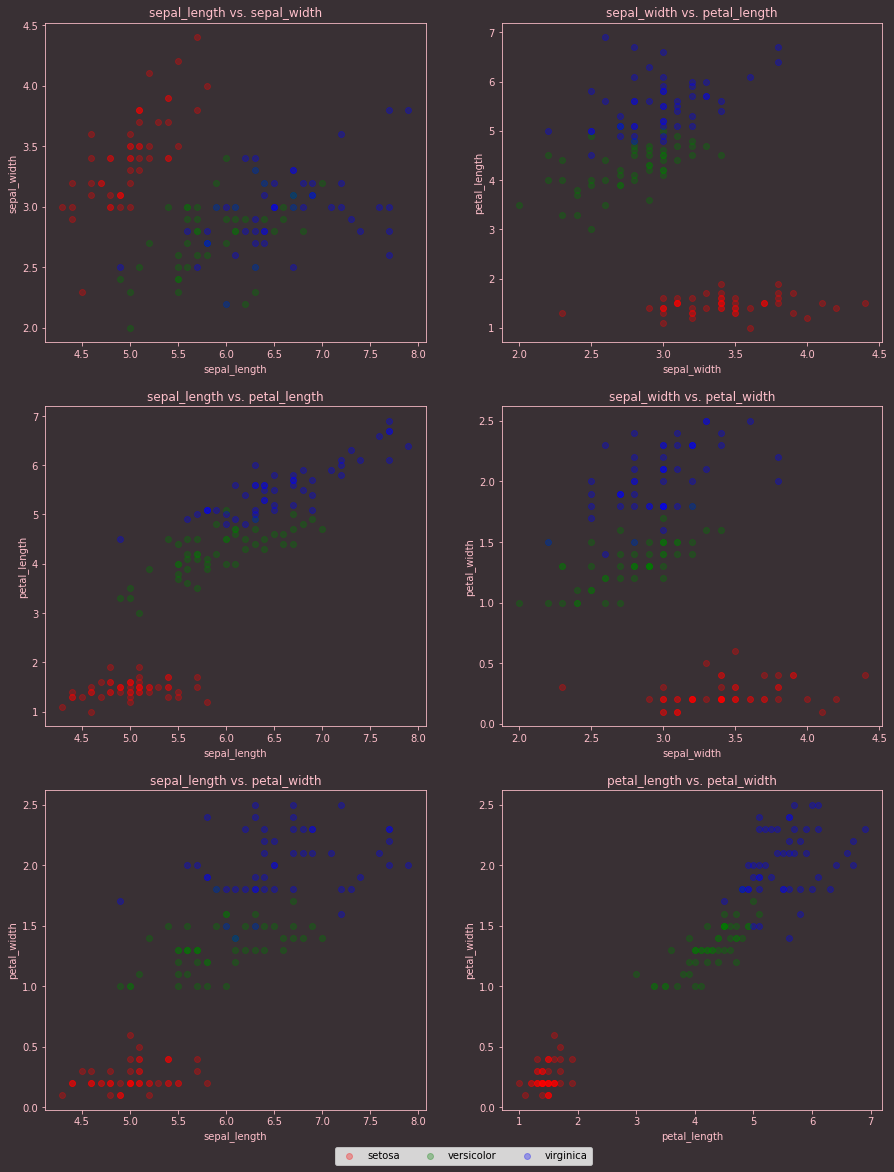

In [24]:
# Create vectors of classes & features
species = np.array(iris_data['species'].unique())
features = np.array(iris_data.drop('species', axis = 1).columns)

# Determine available combinations of features
combo = list(itertools.combinations(features,2))

# Create color dictionary for plotting
colors = {
    'setosa':'red', 
    'versicolor':'green', 
    'virginica':'blue'
    }

# Initialize plotting function
fig, ax = plt.subplots(3,2, figsize = (15,20))

# Iterate through each combination & class
for i in range(len(combo)):
    if i < 3:
        axs = ax[i,0]
    else:
        axs = ax[i-3,1]
    for specie in species:
        temp_data = iris_data[iris_data['species'] == specie].copy(deep=True)
        axs.scatter(temp_data[combo[i][0]], temp_data[combo[i][1]], 
        label = str(specie), c = colors[specie], alpha = 0.3) 
    axs.set_xlabel(combo[i][0]).set_color('pink')
    axs.set_ylabel(combo[i][1]).set_color('pink')
    axs.set_title(str(combo[i][0]) + ' vs. ' + str(combo[i][1])).set_color('pink')
    axs.spines['top'].set_color('pink')
    axs.spines['bottom'].set_color('pink')
    axs.spines['left'].set_color('pink')
    axs.spines['right'].set_color('pink')
    axs.tick_params(axis= 'both', colors = 'pink')
    axs.set_facecolor("#393034")
    fig.patch.set_facecolor("#393034")
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=5)
plt.show()


It may, of course, also be helpful to visualize each of the features alone, with the same intent. 

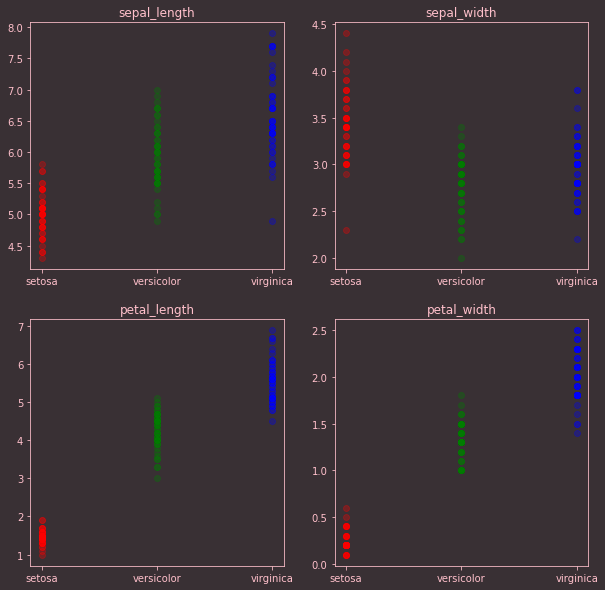

In [25]:
# Define dictionary of colors
colors = {
    'setosa':'red', 
    'versicolor':'green', 
    'virginica':'blue'
    }

# Initialize subplots
fig, ax = plt.subplots(2,2, figsize = (10,10))

# Iterate through the features and then through the classes
for i in range(len(features)):
    if i < 2:
        axs = ax[0,i]
    else:
        axs = ax[1,i-2]
    for specie in species:
        axs.scatter(
            iris_data[iris_data['species'] == specie]['species'],
            iris_data[iris_data['species']== specie][features[i]],
            color = colors[specie], alpha = 0.3)
        axs.set_title(features[i]).set_color('pink')
        axs.spines['top'].set_color('pink')
        axs.spines['bottom'].set_color('pink')
        axs.spines['left'].set_color('pink')
        axs.spines['right'].set_color('pink')
        axs.tick_params(axis= 'both', colors = 'pink')
        axs.set_facecolor("#393034")
        fig.patch.set_facecolor("#393034")

### Mahalanobis Distances 

The Mahalanobis distance is a crucial metric when attempting to understand our data from a **multivariate** perspective. It allows us to find a new set of coordinates around which to base a **confidence ellipse** rather than confidence interval, which is paramount to outlier detection and removal within the multivariate space. 

Mahalanobis Distance is calculated using the following formula:

$MD = (x-m)^T C^{-1} (x-m)$, where:

- x is the analysis vector
- m is the mean vector of the independent variables
- C is the covariance matrix 

Please find the psuedocode (written by me in LaTeX -- source files available upon request) for the Mahalanobis Distance calculation, and subsequent outlier removal. Please note that, within the implementation that will follow later on, I will divide the calculation of the distances and the outlier removal into two separate functions (for ease of plotting). Regardless, I have written the psuedocode below to illustrate the following mechanisms (and sequently perform a brief Time Complexity Analysis):


- Determine the distance from the mean for each observation in the dataset
- Calculate the variance-covariance matrix for the given dataset
- Calculate the inverse of the variance-covariance matrix
- Calculate the distnace (ei-vecs) by performing a dot-product between the mean-distances, the inverse covariance matrix, and the transposed mean-distances. 
- Determine the cutoff (using the Chi2 distribution, usually), and extract the indices of the outliers (those with distances greater than the cutoff)

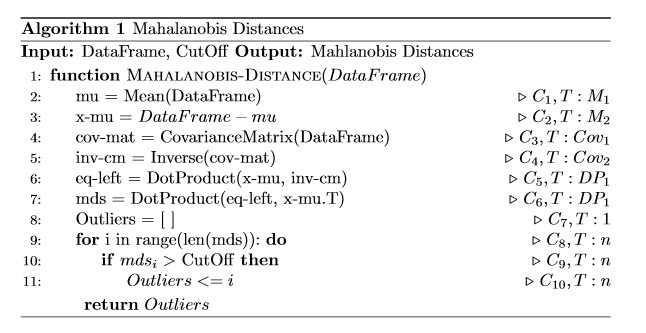

In [26]:
display.Image('Resources/AP_Latex_MDist.jpg')

Please note that the pseudocode above already displays the costs associated with each line, we will expand upon in the section directly following this one.

### Time Complexity Analysis

You will note here that we have assigned certain variable names to various costs and times. This is because certain portions of this code will ask for an operation which, though accomplished with one line, will require a differing number of calculations. We will define these terms below, and talk briefly about their running time such that they may help us in calculation:

**Note**: it is important to note that the code above has been ideated with two features in mind, but should be applicable for even more complex feature spaces. 

- $n$ = length of the dataframe
- $N$ = number of feature of the dataframe
- $M_1$: Mean calculation. This only takes place one time, but it will run proportionally to $N(n+1)$, such that ($O(N*n)$), as it will have to perform $n$ additions + 1 subtraction for each feature.
- $M_2$: Distance calculation. This only takes palce one time, but it will entail $n$ subtractions for each of the N features. 
- $Cov_1$: Covariance Matrix. This also only needs to be performed once, but it is a process that requires operation $X^TX$ (where X is the data matrix). Therefore, this operation will require roughly 2n operations for each of the $N^2$ positions in the dataframe. It will therefore run in $O(2nN^2)$ time. 
- $Cov_2$: Inverse of Covariance Matrix. This will be subject to the same time complexity as the step above.
- $DP_1$: DotProduct calculation. Assuming that addition and multiplication run in constant time, to run a dot product $n$ multiplications and $n-1$ additions must be performed. Therefore, the dotproduct portion of this algortihm will run in $O(n)$ time. 

Keeping all of this in mind, we can easily understand that the covariance matrix calculation will be our most relevant step, running in $O(2nN^2)$ time (where $N$ is the number of features being analyzed). Therefore, we can compute that:

$T(n)$ = $C_1*M_1 + C_2*M_2 + C_3*Cov_1 + C_4*Cov_2 + C_5*DP_1 + C_6*DP_1 + C_7 + C_8*n + C_9*n + C_{10}*n$

Therefore, we will have the algorithm run in a time complexity of (dropping constants):

 $O(n*N^2)$.


### Implementation

In the space below, we will begin by defining our own function for the Mahalanobis Distance, and then performing the same operation for Fisher's LDA. 

**Mahalanobis Distance**: I have implemented the code above using two separate function, for ease of use later on:

- Function "Mahalanobis" will derive the Mahalanobis Distances (lines 2-8 of my pseudocode)
- Function "MD_getOutliers" will perform the comparison against the chi2 distribution and return outliers (lines 9-11 of my pseudocode))

The reasoning behind this is simply because, in certain instances, we may only want to call a function to retain the distances (as we will see later), but other times we are only interested in the indices of the outliers. Naturally, it is quite possible and easy to merge these two to form the pseudocode, but they are broken apart here for convenience in analysis later on. 

In order to define our mahalanobis functions, we will leverage:


- Numpy's mean(), cov(), matrix_power() and dot() functions to find the mean of the dataset, the covariance matrix, its inverse, and to perform the dot products necessary. 
- Scipy Stats' chi2 to perform a cutoff calculation against which we may weight our distances in outlier definition. 

What follows is my implementation in Python:

In [33]:
# Function to retain distances
def mahalanobis(x=None, data=None, cov=None):
    
    # Find Distance from Mean
    x_mu = x - np.mean(data)

    # Calculate covariance matrix if not provided
    if not cov:
        cov = np.cov(data.values.T)

    # Invert Covariance Matrix
    inv_covmat = np.linalg.matrix_power(cov, -1)

    # Return Left and Right Dot Products
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

# Function to only get outliers
def MD_getOutliers(x, data, cl, deg_freedom):
    MD = mahalanobis(x,data)
    
    # Define Cutoff using chi2
    cutoff = scpstats.chi2.ppf(cl, deg_freedom)

    # Find and return outlier indices
    outliers = np.where(MD > cutoff)
    return outliers

What follows below is not a necessary portion of the Mahalanobis distance calculation, but it is an implementation of its underlying logic, made with the goal of plotting confidence ellipses for our data analysis later on. As such, the code below will:

- Leverage matplotlib's patches function to create an ellipse
- Use the same logic, applying the mahalanobis distance calculation to the dataset, in order to compute a confidence ellipse with the same inputs as those used to calculate mahalanobis distances. 

The intent here is to create an **visual heuristic** to represent the confidence bound against which we will weight the results of the mahalanobis distance analysis for outlier removal. 

In [34]:
def confidence_ellipse(data, cl, deg_freedom, ax, edgecolor, **kwargs):
    # Extract axes of interest
    x = data.iloc[:,0]
    y = data.iloc[:,1]

    # Compute covariance matrix & cut-off
    cov = np.cov(x,y, rowvar = False)
    cutoff = scpstats.chi2.ppf(cl, deg_freedom)

    # Extract eigenvectors from dataset for transformation
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)

    # Plot ellipse with given arguments
    ellipse = matplotlib.patches.Ellipse(xy = (np.mean(x), np.mean(y)), width=lambda_[0]*np.sqrt(cutoff)*2, 
                      height=lambda_[1]*np.sqrt(cutoff)*2, 
                      angle=np.rad2deg(np.arccos(v[0,0])),
                      edgecolor = edgecolor,  **kwargs)
    ellipse.set_facecolor('none')

    return ax.add_patch(ellipse)


The code that follows will leverage the functions that we just built to plot each of the classes in each of the feature combinations, such that we may attempt to understand where our outliers exist in a multi-variate space. **Please note** that the code below will also generate a dataset spanning all 6 combinations (such that N = 900) to store the mahalanobis distance for each class within each feature combination. 

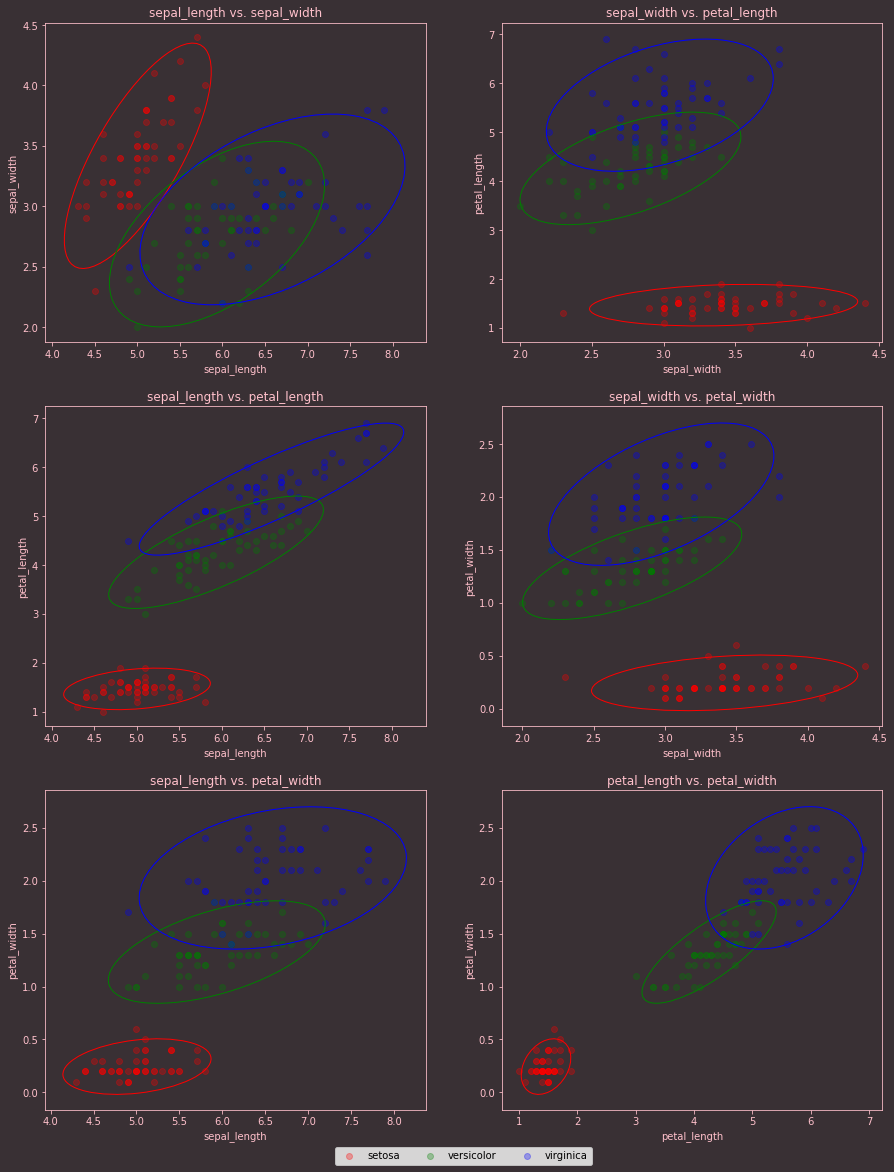

In [36]:
# Define feature combinations and species list for iteration
species = np.array(iris_data['species'].unique())
features = np.array(iris_data.drop('species', axis = 1).columns)

# Define combinations of features 
combo = list(itertools.combinations(features,2))

# Initialize new DataFrame & Output for iteration
mahalanobis_df = pd.DataFrame(columns = ['sepal_length', 'sepal_width',
 'petal_length', 'petal_width', 'species', 'feature_1', 
 'feature_2', 'ma_dist'])
out = []

# Initialize plotting space & colors dictionary
fig, ax = plt.subplots(3,2, figsize = (15,20))
colors = {
    'setosa':'red', 
    'versicolor':'green', 
    'virginica':'blue'
    }

# Initialize Iteration through feature combos
for i in range(len(combo)):
    
    # Suplot conditions
    if i < 3:
        axs = ax[i,0]
    else:
        axs = ax[i-3,1]

    # Initialize iteration through species 
    for specie in species: 

        # Extract data of interest for iteration
        temp_data = iris_data[iris_data['species'] == specie].copy(deep=True)

        # Calculate Distances and append to total output df
        distances = mahalanobis(temp_data[[combo[i][0], combo[i][1]]], 
        temp_data[[combo[i][0], combo[i][1]]])
        temp_data['ma_dist'] = distances
        temp_data['feature_1'] = str(combo[i][0])
        temp_data['feature_2'] = str(combo[i][1])
        mahalanobis_df = pd.concat([mahalanobis_df, temp_data])

        # Begin plotting and call confidence ellipse
        axs.scatter(temp_data[[combo[i][0]]], temp_data[[combo[i][1]]],
         c = colors[specie] , label = str(specie), marker = 'o', alpha = 0.3)
        confidence_ellipse(temp_data[[combo[i][0], combo[i][1]]], 0.95, 2, axs, colors[specie])
    axs.set_title(str(combo[i][0]) + ' vs. ' + str(combo[i][1])).set_color('pink')
    axs.set_xlabel(combo[i][0]).set_color('pink')
    axs.set_ylabel(combo[i][1]).set_color('pink')
    axs.spines['top'].set_color('pink')
    axs.spines['bottom'].set_color('pink')
    axs.spines['left'].set_color('pink')
    axs.spines['right'].set_color('pink')
    axs.tick_params(axis= 'both', colors = 'pink')
    axs.set_facecolor("#393034")
    fig.patch.set_facecolor("#393034")
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=5)
plt.show()

We now have an excellent visualization for how our data is distributed within a 2-dimensional multivariate space. From this visualization, we can easily determine where our outliers lie in the multivariate space. We can quickly notice that:

- Setosa has a large amount of outliers within the "sepal length / petal length", "petal length / petal width" space, and "petal width / sepal width" space, as well as within the "petal width / petal length" space. At a glance, then, we are able to tell which observations are obvious outliers in multivariate space for the class (within a 95% confidence level, in this case), and which are not. 
- Versicolor has very few outliers in multivariate space, with the greatest proportion in the "sepal width / sepal length" space. 
- Virginica also had few outliers in multivariate space, with the greatest proportion in the "sepal width / petal length" space. 

**More importantly**, however, these visualizations are an excellent tool for feature ranking. Within this multivariate space, we can easily and quickly grasp which combinatorial feature space displays the cleanest separation of data. In our case, this space is clearly the **petal** space, as there is hardly any overlap between classes. If we were to adjust our chi2 distribution parameters, we would likely see even further distinction between the class ellipses. 

Further still, we can use the mahalanobis global DataFrame to generate a clearer view of the observations in question. (One of the reasons we created two separate functions in our implementation). Here, we show the first five highest (to not clutter the page with the entire set)

In [ ]:
mahalanobis_df[mahalanobis_df['ma_dist'] > scpstats.chi2.ppf(0.95, 2)].reset_index(drop = True).sort_values(by = 'ma_dist', ascending = False).head()

,sepal_length,sepal_width,petal_length,petal_width,species,feature_1,feature_2,ma_dist
19,5.0,3.5,1.6,0.6,setosa,sepal_length,petal_width,11.992340
38,5.0,3.5,1.6,0.6,setosa,sepal_width,petal_width,11.580274
31,7.7,2.6,6.9,2.3,virginica,sepal_width,petal_length,11.419305
47,5.0,3.5,1.6,0.6,setosa,petal_length,petal_width,11.086465
40,6.2,2.2,4.5,1.5,versicolor,sepal_width,petal_width,11.082353


With the Mahalanobis distance, we have now attained three crucial points of understanding:

- Detection of outliers in multivariate space, for each class and each feature combination. 
- Crucial insight towards the separability of the classes within multi-variate space. 

Therefore, we can now move on to performing our Fisher's Linear Discriminant. By **cleaning our data** using Mahalanobis Distance metholodogy, we can be confident that the data has been prepared correctly for use within a tool like Fisher's LDA (which operates in multivariate space). 